In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x = np.linspace(0,50,501)


In [3]:
y = np.sin(x)

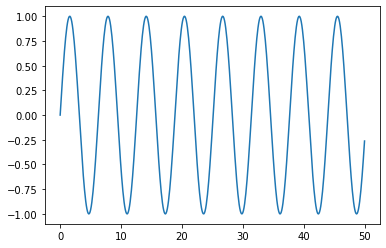

In [4]:
plt.plot(x,y)

In [5]:
df = pd.DataFrame(data = y,index=x,columns=['Sine'])

In [6]:
df

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


In [7]:
len(df)

501

In [8]:
test_percentage = 0.1

In [9]:
len(df)*test_percentage

50.1

In [10]:
test_point = np.round(len(df)*test_percentage)

In [11]:
test_point

50.0

In [12]:
test_index = int(int(len(df)) - test_point)

In [13]:
test_index

451

In [14]:
train = df.iloc[:test_index]

In [15]:
train

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
44.6,0.579164
44.7,0.657656
44.8,0.729577
44.9,0.794208


In [16]:
test = df.iloc[test_index:]

In [101]:
(test)

,Sine,predictions,LSTM pred
45.1,0.899097,0.901324,0.897243
45.2,0.938307,0.940149,0.936198
45.3,0.968142,0.969252,0.964928
45.4,0.988304,0.988926,0.983196
45.5,0.998591,0.998193,0.990927
45.6,0.998900,0.996833,0.988176
45.7,0.989229,0.985374,0.975131
45.8,0.969673,0.964662,0.952097
45.9,0.940429,0.933740,0.919481
46.0,0.901788,0.893998,0.877772


In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
mms = MinMaxScaler()

In [20]:
mms_train = mms.fit_transform(train)

In [21]:
mms_test = mms.transform(test)

In [22]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [23]:
#help(TimeseriesGenerator)

In [24]:
length = 25
batch_size = 1

generator = TimeseriesGenerator(mms_train,mms_train, 
                length= length, batch_size=batch_size)

In [25]:
len(mms_train)

451

In [26]:
len(generator)

426

In [27]:
X,y = generator[0]

In [28]:
X

array([[[0.49999912],
        [0.54991622],
        [0.59933458],
        [0.64776041],
        [0.69470985],
        [0.73971381],
        [0.78232262],
        [0.82211054],
        [0.85868004],
        [0.89166571],
        [0.92073798],
        [0.94560637],
        [0.9660224 ],
        [0.98178208],
        [0.99272794],
        [0.99875061],
        [0.99978993],
        [0.9958355 ],
        [0.98692684],
        [0.97315296],
        [0.95465148],
        [0.93160726],
        [0.90425056],
        [0.87285471],
        [0.83773342]]])

In [29]:
y

array([[0.79923759]])

In [30]:
length = 50
batch_size = 1

generator = TimeseriesGenerator(mms_train,mms_train, 
                length= length, batch_size=batch_size)

In [31]:
from tensorflow.keras.models import Sequential

In [32]:
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

In [33]:
n_features = 1 #wehave only 1 feature i.e. X

In [34]:
model = Sequential()

model.add(SimpleRNN(50, input_shape= (length, n_features)))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [35]:
model.fit_generator(generator, epochs=5)

C:\Users\Piyush Dewangan\anaconda3\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
401/401 [==============================] - 7s 14ms/step - loss: 0.0048
Epoch 2/5
401/401 [==============================] - 6s 15ms/step - loss: 5.7283e-05
Epoch 3/5
401/401 [==============================] - 6s 15ms/step - loss: 3.3003e-04
Epoch 4/5
401/401 [==============================] - 6s 15ms/step - loss: 4.7192e-04
Epoch 5/5
401/401 [==============================] - 6s 15ms/step - loss: 1.2621e-04


In [36]:
losses = pd.DataFrame(model.history.history)

In [37]:
losses

,loss
0,0.004815
1,0.000057
2,0.000330
3,0.000472
4,0.000126


<AxesSubplot:>

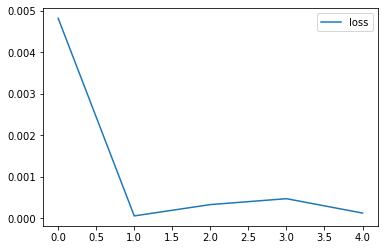

In [38]:
losses.plot()

In [ ]:
# NOW GOING TO PREDICT THE SERIES OF POINT------------>

In [39]:
first_eval_batch = mms_train[-length:]

In [40]:
first_eval_batch = first_eval_batch.reshape((1,length,n_features))

In [41]:
model.predict(first_eval_batch)

array([[0.9506647]], dtype=float32)

In [42]:
mms_test[0]

array([0.94955134])

In [43]:
# here we are trying to get list prediction
# previously we are predicting only one output

test_predictions = []

first_eval_batch = mms_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

In [44]:
# #here just removing 1st no. and putting the predicted value at last
# predicted_value = [[[99]]]
# print(np.append(current_batch[:,1:,:],[[[99]]]))

In [47]:
test_predictions = []

first_eval_batch = mms_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)  

In [48]:
#test_predictions

[array([0.9506647], dtype=float32),
 array([0.9700776], dtype=float32),
 array([0.98462915], dtype=float32),
 array([0.99446625], dtype=float32),
 array([0.99909955], dtype=float32),
 array([0.9984195], dtype=float32),
 array([0.9926901], dtype=float32),
 array([0.98233396], dtype=float32),
 array([0.9668729], dtype=float32),
 array([0.9470016], dtype=float32),
 array([0.92323786], dtype=float32),
 array([0.8951594], dtype=float32),
 array([0.86365837], dtype=float32),
 array([0.8289871], dtype=float32),
 array([0.7914316], dtype=float32),
 array([0.75117356], dtype=float32),
 array([0.70890135], dtype=float32),
 array([0.66497177], dtype=float32),
 array([0.61916476], dtype=float32),
 array([0.5725363], dtype=float32),
 array([0.5251618], dtype=float32),
 array([0.47732276], dtype=float32),
 array([0.42959693], dtype=float32),
 array([0.38235486], dtype=float32),
 array([0.33618712], dtype=float32),
 array([0.2912405], dtype=float32),
 array([0.2485398], dtype=float32),
 array([0.2081

In [49]:
#mms_test

array([[9.49551344e-01],
       [9.69156618e-01],
       [9.84074225e-01],
       [9.94155114e-01],
       [9.99298559e-01],
       [9.99453170e-01],
       [9.94617400e-01],
       [9.84839568e-01],
       [9.70217371e-01],
       [9.50896908e-01],
       [9.27071224e-01],
       [8.98978376e-01],
       [8.66899060e-01],
       [8.31153800e-01],
       [7.92099752e-01],
       [7.50127132e-01],
       [7.05655314e-01],
       [6.59128649e-01],
       [6.11012013e-01],
       [5.61786173e-01],
       [5.11942978e-01],
       [4.61980443e-01],
       [4.12397778e-01],
       [3.63690397e-01],
       [3.16344967e-01],
       [2.70834550e-01],
       [2.27613868e-01],
       [1.87114770e-01],
       [1.49741909e-01],
       [1.15868702e-01],
       [8.58335998e-02],
       [5.99367021e-02],
       [3.84367625e-02],
       [2.15486014e-02],
       [9.44095974e-03],
       [2.23481297e-03],
       [2.16257798e-06],
       [2.76531647e-03],
       [1.04966661e-02],
       [2.31189624e-02],


In [50]:
true_pred = mms.inverse_transform(test_predictions)

In [52]:
test['predictions'] = true_pred

<ipython-input-52-4bbc625e8aa3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions'] = true_pred


<AxesSubplot:>

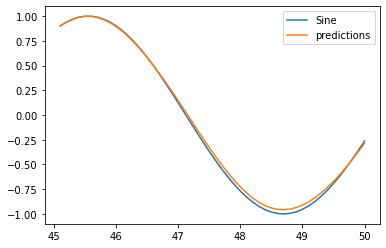

In [54]:
test.plot()

In [55]:
from tensorflow.keras.callbacks import EarlyStopping

In [56]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [61]:
length = 49
generator = TimeseriesGenerator(mms_train,mms_train,
                                length=length, batch_size=1)

validation_generator = TimeseriesGenerator(mms_test,mms_test,
                                           length=length, batch_size=1)

In [62]:
model = Sequential()

model.add(LSTM(50, input_shape= (length, n_features)))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [63]:
model.fit_generator(generator,epochs=20,
                   validation_data=validation_generator,
                   callbacks=early_stop)

Epoch 1/20
402/402 [==============================] - 6s 11ms/step - loss: 0.0205 - val_loss: 1.1323e-05
Epoch 2/20
402/402 [==============================] - 4s 10ms/step - loss: 1.1312e-04 - val_loss: 3.5556e-05
Epoch 3/20
402/402 [==============================] - 4s 11ms/step - loss: 1.7144e-04 - val_loss: 3.3961e-06
Epoch 4/20
402/402 [==============================] - 5s 12ms/step - loss: 1.6807e-04 - val_loss: 7.5934e-06
Epoch 5/20
402/402 [==============================] - 5s 13ms/step - loss: 4.7117e-04 - val_loss: 7.8449e-05


In [64]:
test_predictions = []

first_eval_batch = mms_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)  

<ipython-input-66-3aa7eae7fdc6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['LSTM pred'] = true_pred


<AxesSubplot:>

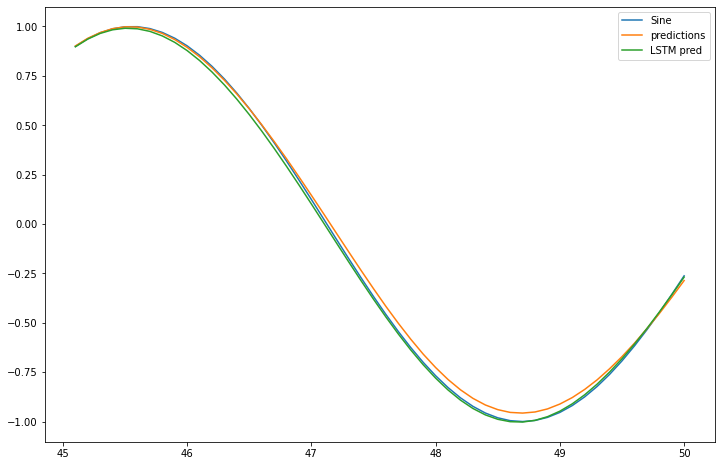

In [66]:
true_pred = mms.inverse_transform(test_predictions)
test['LSTM pred'] = true_pred
test.plot(figsize=(12,8))

In [67]:
# befor this we are just predicting the test datas
# now we are going to predict the future points...

full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [69]:
generator = TimeseriesGenerator(scaled_full_data,scaled_full_data,
                               length=length, batch_size=1)

In [ ]:
model = Sequential()

model.add(LSTM(50, input_shape= (length, n_features)))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [71]:
model.fit_generator(generator,epochs=6)

Epoch 1/6
 12/452 [..............................] - ETA: 4s - loss: 8.8973e-05

C:\Users\Piyush Dewangan\anaconda3\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


452/452 [==============================] - 5s 11ms/step - loss: 1.2818e-04
Epoch 2/6
452/452 [==============================] - 5s 11ms/step - loss: 1.2365e-04: 0s - loss: 1.2495e-
Epoch 3/6
452/452 [==============================] - 5s 11ms/step - loss: 1.8540e-04
Epoch 4/6
452/452 [==============================] - 6s 13ms/step - loss: 1.1183e-04
Epoch 5/6
452/452 [==============================] - 6s 13ms/step - loss: 3.1850e-05
Epoch 6/6
452/452 [==============================] - 6s 12ms/step - loss: 2.1859e-04


In [92]:
forecast = []

first_eval_batch = mms_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(100):
    current_pred = model.predict(current_batch)[0]
    forecast.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)  

In [93]:
df

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


In [94]:
forecast = full_scaler.inverse_transform(forecast)

In [95]:
100*0.1

10.0

In [96]:
forecast_index = np.arange(50.1,60.1,step=0.1)

In [97]:
len(forecast)

100

In [98]:
len(forecast_index)

100

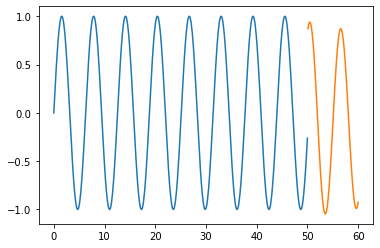

In [99]:
plt.plot(df.index,df['Sine'])
plt.plot(forecast_index, forecast)